The code you're running loads a CSV file from a Google Sheet URL into a pandas DataFrame. It uses `pd.read_csv()` to fetch the data, then prints the first few rows of the data in a clean, table-like format using the `tabulate` module. This makes it easy to visually inspect a preview of the data in your console. Additionally, the tabular format used by `tabulate` makes the output more readable.


In [63]:
import pandas as pd

# Direct link to access the Google Sheet in CSV format
sheet_url = "https://docs.google.com/spreadsheets/d/1aoM7R_UQtf7TFTbtzV48U1AmoFyOYJWx/export?format=csv"

# Load the data into a DataFrame
df = pd.read_csv(sheet_url)

# Display the first few rows in tabular format
from tabulate import tabulate

# Using tabulate for a clean table-like display
print(tabulate(df.head(), headers='keys', tablefmt='pipe'))


|    |     ID | Entry Date   | Date of Extract   | Duration in programme   |   No. of implements owned | 1st Implement   | 2nd Implement   | Region of operation   | Country   | 2022             | 2023             |             2024 | Rented Implement?   |   Implement |     Days |     Acres  | Total Acres Serviced   |
|    |        |              |                   |                         |                           |                 |                 |                       |           | Acres serviced   | Acres serviced   |   Acres serviced |                     |      rented |   rented |   serviced |                        |
|---:|-------:|:-------------|:------------------|:------------------------|--------------------------:|:----------------|:----------------|:----------------------|:----------|:-----------------|:-----------------|-----------------:|:--------------------|------------:|---------:|-----------:|:-----------------------|
|  0 | 503176 | 19/1/2022    | 22/11/2024  

In [64]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0    ID                      194 non-null    int64 
 1   Entry Date               194 non-null    object
 2   Date of Extract          194 non-null    object
 3   Duration in programme    194 non-null    object
 4   No. of implements owned  194 non-null    int64 
 5   1st Implement            192 non-null    object
 6   2nd Implement            93 non-null     object
 7   Region of operation      194 non-null    object
 8   Country                  194 non-null    object
 9   2022
Acres serviced      185 non-null    object
 10  2023
Acres serviced      188 non-null    object
 11  2024
Acres serviced      189 non-null    object
 12  Rented Implement?        194 non-null    object
 13  Implement
rented         9 non-null      object
 14  Days
rented              194 non-null    i

In [30]:
# Clean column names by removing extra spaces and newlines
df.columns = df.columns.str.replace('\n', ' ').str.strip()


In [89]:
print(df.columns)


Index([' ID', 'Entry Date', 'Date of Extract', 'Duration in programme',
       'No. of implements owned', '1st Implement', '2nd Implement',
       'Region of operation', 'Country', '2022\nAcres serviced',
       '2023\nAcres serviced', '2024\nAcres serviced', 'Rented Implement?',
       'Implement\nrented', 'Days\nrented', 'Acres \nserviced',
       'Total Acres Serviced'],
      dtype='object')




1. **Data Preprocessing**: It converts date columns to `datetime`, fills missing values for implements, and converts acres data to numeric format.

2. **Total Acres Calculation**: It computes the total acres serviced across 2022, 2023, and 2024 for each record.

3. **Aggregation by Year**: It aggregates the total acres serviced by year and plots this data over time.

4. **Performance Analysis**: It calculates and plots the average acres serviced based on the number of implements owned.

5. **Forecasting**: Using SARIMAX, it fits a time series model to forecast the next 3 years of acres serviced.



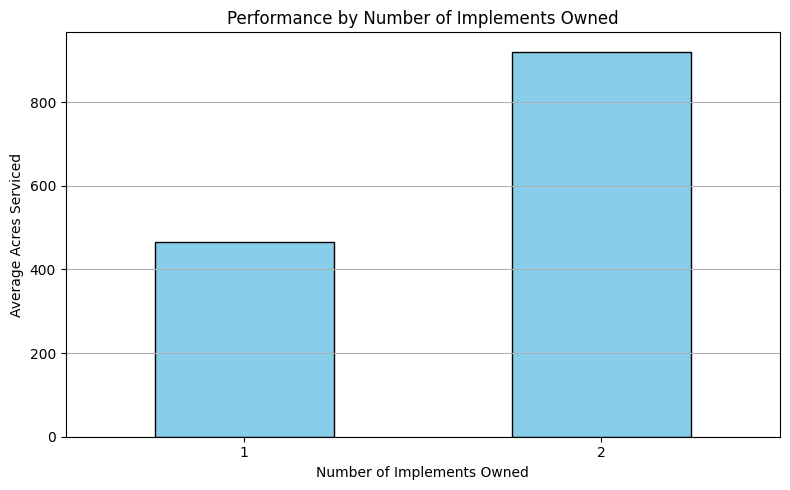

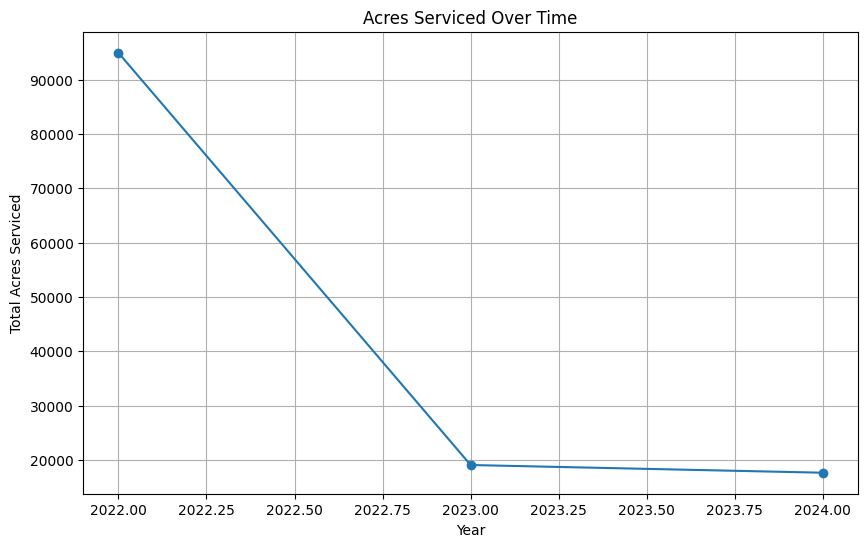

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

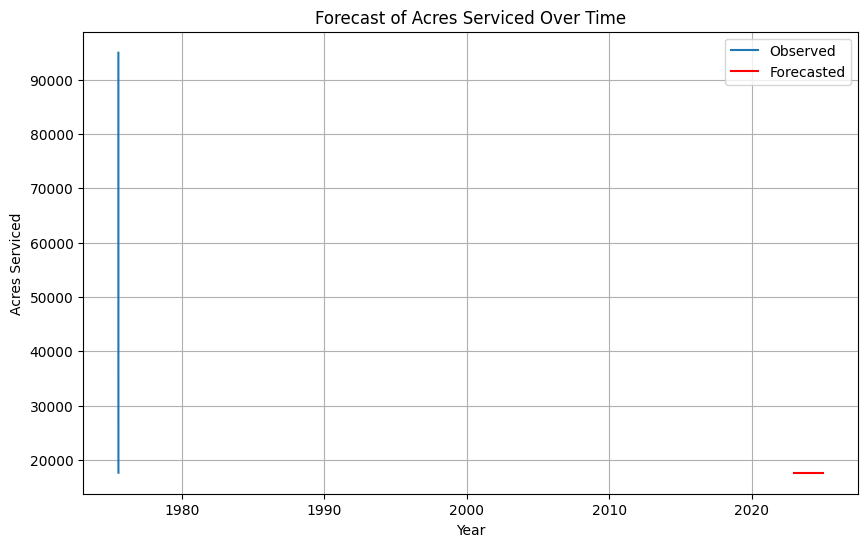

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert date columns to datetime
df['Entry Date'] = pd.to_datetime(df['Entry Date'])
df['Date of Extract'] = pd.to_datetime(df['Date of Extract'])

# Fill missing implement values and convert acres to numeric
df['2nd Implement'] = df['2nd Implement'].fillna('None')
df['2022\nAcres serviced'] = pd.to_numeric(df['2022\nAcres serviced'], errors='coerce')
df['2023\nAcres serviced'] = pd.to_numeric(df['2023\nAcres serviced'], errors='coerce')
df['2024\nAcres serviced'] = pd.to_numeric(df['2024\nAcres serviced'], errors='coerce')

# Calculate total acres serviced across all years
df['Total Acres Serviced'] = df[['2022\nAcres serviced', '2023\nAcres serviced', '2024\nAcres serviced']].sum(axis=1)

# Aggregate acres serviced by year
df['Year'] = df['Entry Date'].dt.year
acres_by_year = df.groupby('Year')['Total Acres Serviced'].sum()

# Compare performance based on the number of implements owned
df['No. of implements owned'] = pd.to_numeric(df['No. of implements owned'], errors='coerce')
implement_performance = df.groupby('No. of implements owned')['Total Acres Serviced'].mean()

# Plot performance based on implements
plt.figure(figsize=(8, 5))
implement_performance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Performance by Number of Implements Owned')
plt.xlabel('Number of Implements Owned')
plt.ylabel('Average Acres Serviced')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the time series of acres serviced over the years
plt.figure(figsize=(10, 6))
acres_by_year.plot(kind='line', marker='o')
plt.title('Acres Serviced Over Time')
plt.xlabel('Year')
plt.ylabel('Total Acres Serviced')
plt.grid(True)
plt.show()

# Time Series Forecasting using SARIMA model
model = SARIMAX(acres_by_year, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 3 years
forecast = results.get_forecast(steps=3)
forecast_index = pd.date_range(start='2022', periods=3, freq='Y')
forecast_values = forecast.predicted_mean

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(acres_by_year, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecasted', color='red')
plt.title('Forecast of Acres Serviced Over Time')
plt.xlabel('Year')
plt.ylabel('Acres Serviced')
plt.legend()
plt.grid(True)
plt.show()


The code combines the observed data with the forecast by creating a new DataFrame for the forecasted values and merging it with the original data. It then plots both the observed and forecasted acres serviced over time, marking the forecast start with a vertical dashed line at 2024. The plot visually represents the trend, including the future forecast, and prints the combined dataset with observed and forecasted values.



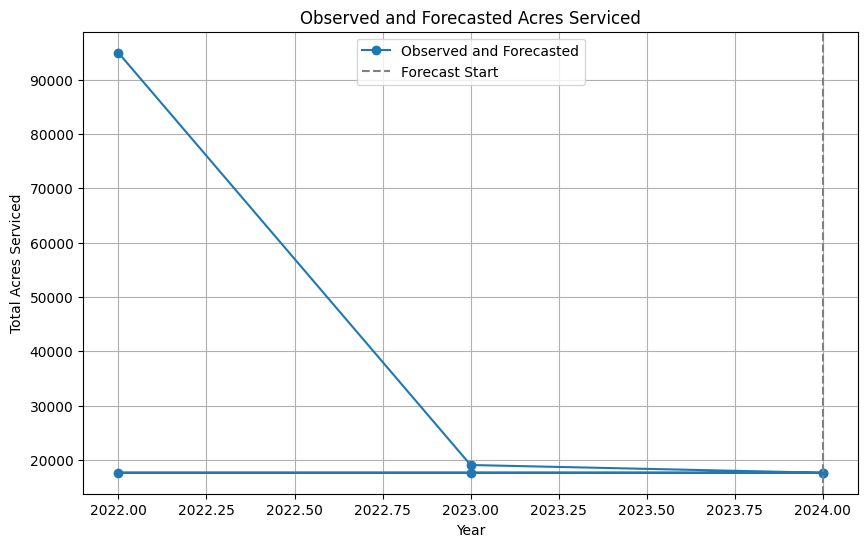

   Year  Total Acres Serviced
0  2022              94927.20
1  2023              19097.66
2  2024              17681.22
3  2022              17681.22
4  2023              17681.22
5  2024              17681.22


In [95]:
# Combine the observed data with the forecast
forecast_df = pd.DataFrame({'Year': forecast_index.year, 'Total Acres Serviced': forecast_values.values})
combined_df = acres_by_year.reset_index().rename(columns={'Year': 'Year', 'Total Acres Serviced': 'Total Acres Serviced'})
combined_df = pd.concat([combined_df, forecast_df], ignore_index=True)

# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['Total Acres Serviced'], label='Observed and Forecasted', marker='o')
plt.axvline(x=2024, color='gray', linestyle='--', label='Forecast Start')
plt.title('Observed and Forecasted Acres Serviced')
plt.xlabel('Year')
plt.ylabel('Total Acres Serviced')
plt.legend()
plt.grid(True)
plt.show()

# Print the combined data
print(combined_df)


In [97]:
combined_df

,Year,Total Acres Serviced
0,2022,94927.20
1,2023,19097.66
2,2024,17681.22
3,2022,17681.22
4,2023,17681.22
5,2024,17681.22


A pie chart to show the proportion of customers who rented an implement versus those who did not. The chart visualizes this distribution with labeled segments and corresponding percentages. Additionally, it prints the total number of customers, the number who rented an implement, and the percentage of those who rented.

Before running this, ensure that `rented_implement_customers`, `total_customers`, and `percentage_rented` are defined in your code for accurate results.

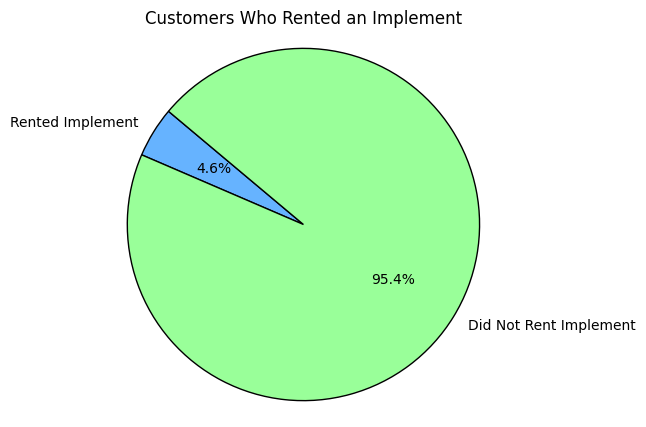

Total Customers: 194
Customers who rented an implement: 9
Percentage of customers who rented an implement: 4.64%


In [50]:
import matplotlib.pyplot as plt

# Prepare the data for the pie chart
labels = ['Rented Implement', 'Did Not Rent Implement']
sizes = [rented_implement_customers, total_customers - rented_implement_customers]
colors = ['#66b3ff', '#99ff99']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Customers Who Rented an Implement')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the results
print(f"Total Customers: {total_customers}")
print(f"Customers who rented an implement: {rented_implement_customers}")
print(f"Percentage of customers who rented an implement: {percentage_rented:.2f}%")



Calculates the number of customers who rented an implement and visualizes the data in a pie chart, showing the proportion of customers who rented an implement versus those who did not. It also prints the total number of customers, the number of customers who rented an implement, and the percentage of customers who rented.

The variables used in the code are:
- `rented_implement_customers`: Number of customers who rented an implement.
- `total_customers`: Total number of customers in the dataset.
- `percentage_rented`: Percentage of customers who rented an implement.

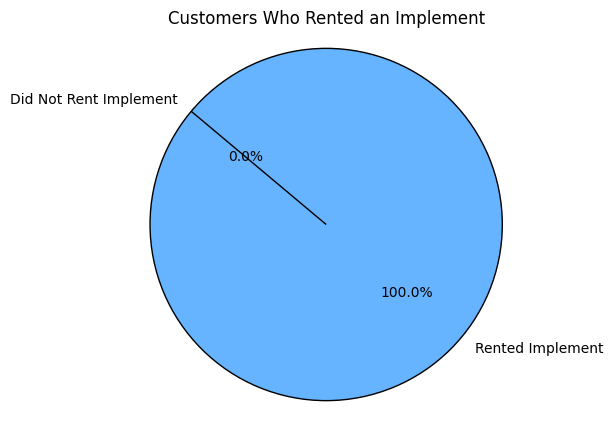

Total Customers: 194
Customers who rented an implement: 194
Percentage of customers who rented an implement: 100.00%


In [61]:
# prompt: Rented Implement Type: Specifies the type of implement rented. For customers who haven’t rented, this column will indicate "None.

# Calculate the number of customers who rented an implement
rented_implement_customers = len(df[df['Implement\nrented'] != 'None'])

# Total customers
total_customers = len(df)

# Calculate the percentage of customers who rented an implement
if total_customers > 0:
    percentage_rented = (rented_implement_customers / total_customers) * 100
else:
    percentage_rented = 0  # Handle the case where there are no customers

# Prepare the data for the pie chart
labels = ['Rented Implement', 'Did Not Rent Implement']
sizes = [rented_implement_customers, total_customers - rented_implement_customers]
colors = ['#66b3ff', '#99ff99']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Customers Who Rented an Implement')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the results
print(f"Total Customers: {total_customers}")
print(f"Customers who rented an implement: {rented_implement_customers}")
print(f"Percentage of customers who rented an implement: {percentage_rented:.2f}%")


Analyzes the rental duration of implements by calculating the descriptive statistics and visualizing the distribution. It converts the 'Days rented' column to numeric values, handles any non-numeric entries by coercing them into NaN, and then computes statistics like the mean, median, and standard deviation. It visualizes the distribution using a histogram and boxplot to identify potential outliers in rental durations.

This process helps identify patterns in rental behavior, such as typical rental durations and extreme values that could be outliers.


Rental Duration Statistics:
 count    194.000000
mean       0.541237
std        4.198550
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       53.000000
Name: Days\nrented, dtype: float64


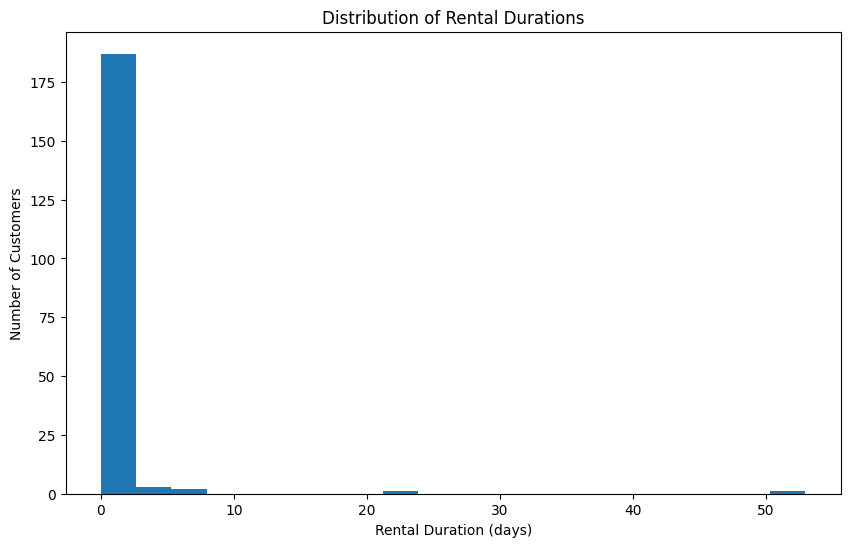

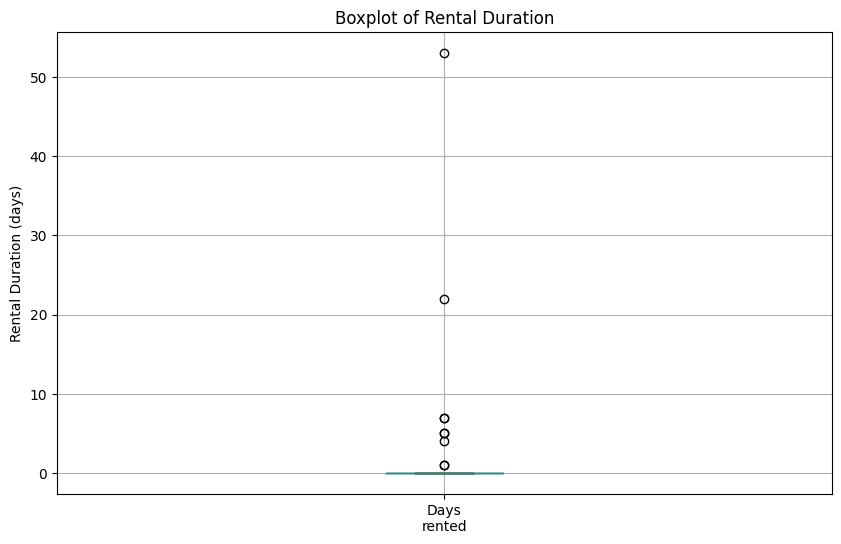

In [70]:
# Analyze Rental Duration

df['Days\nrented'] = pd.to_numeric(df['Days\nrented'], errors='coerce')

# Calculate descriptive statistics for 'Rental Duration'
rental_duration_stats = df['Days\nrented'].describe()
print("\nRental Duration Statistics:\n", rental_duration_stats)

# Visualize Rental Duration distribution
plt.figure(figsize=(10, 6))
df['Days\nrented'].plot(kind='hist', bins=20) # Adjust bins as needed
plt.title('Distribution of Rental Durations')
plt.xlabel('Rental Duration (days)')
plt.ylabel('Number of Customers')
plt.show()

#Example: Boxplot to identify outliers
plt.figure(figsize=(10,6))
df.boxplot(column='Days\nrented')
plt.title('Boxplot of Rental Duration')
plt.ylabel('Rental Duration (days)')
plt.show()

Calculates the total acres serviced with rented implements by summing the values in the 'Acres serviced' column. It then visualizes the distribution of acres serviced with a histogram, providing insights into how frequently different acre ranges are serviced. The total acres serviced is also printed to give a clear metric of performance.

The plot helps to see how spread out the acres serviced are, while the printed total gives a concrete figure for overall acres serviced with rented implements.

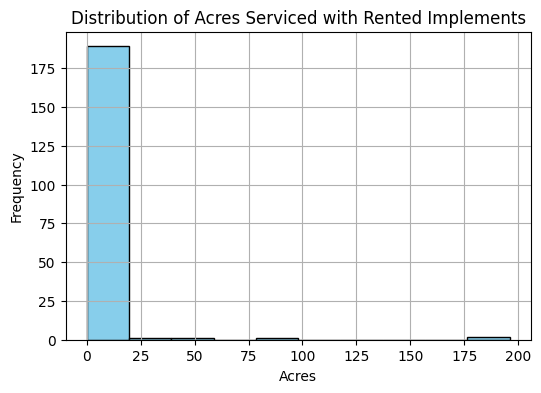

Total Acres Serviced with Rented Implements: 595


In [74]:
# Total acres serviced with rented implements
total_rented_acres = df['Acres \nserviced'].sum()

# Plot results
plt.figure(figsize=(6, 4))
df['Acres \nserviced'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Acres Serviced with Rented Implements')
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.show()

print(f"Total Acres Serviced with Rented Implements: {total_rented_acres}")


Analyzes how the number of implements owned affects the performance in terms of total acres serviced. It groups the data by the number of implements owned and calculates the mean, sum, and count of acres serviced for each group. This helps to determine if owning more implements results in more acres serviced. A bar plot is then generated to visualize the difference in performance across different ownership levels (one vs. two implements).

The printed output shows the statistical comparison, and the plot highlights the performance disparity.

Calculates the correlation between the total acres serviced and the number of implements owned, displaying the result. A scatter plot is created to visualize this relationship, helping to determine if there is a direct connection between the two variables. If the correlation is high, it suggests that owning more implements might lead to servicing more acres. The scatter plot further illustrates this by showing the spread of data points.

Correlation between Total Acres Serviced and Number of Implements Owned: 0.3690663692640699


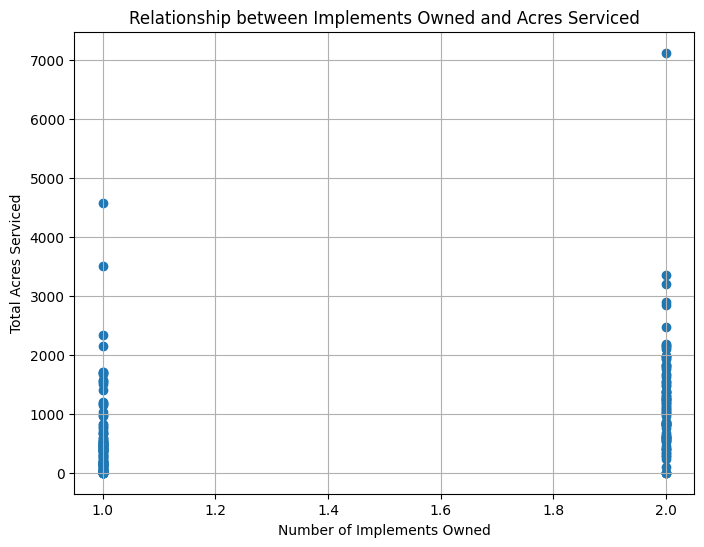

In [84]:
# Calculate the correlation between rented implements and total acres serviced
correlation = df['Total Acres Serviced'].corr(df['No. of implements owned'])

print(f"Correlation between Total Acres Serviced and Number of Implements Owned: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['No. of implements owned'], df['Total Acres Serviced'])
plt.xlabel('Number of Implements Owned')
plt.ylabel('Total Acres Serviced')
plt.title('Relationship between Implements Owned and Acres Serviced')
plt.grid(True)
plt.show()